In [1]:
import pandas as pd
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import nltk
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from joblib import dump

In [2]:
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
print("Number of rows : ",data.shape[0])
print("Number of columns : ", data.shape[1])

Number of rows :  50000
Number of columns :  2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 390.7+ KB


In [5]:
data.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [6]:
text = data["review"][1]
text

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [7]:
cleantext = BeautifulSoup(text, "lxml").text
cleantext

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [8]:
cleantext = re.sub(r'[^\w\s]','',cleantext)
cleantext

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
cleantext= cleantext.lower()
stopword = set(stopwords.words('english'))
tokens= cleantext.split()
token_list = []
for token in tokens:
    if token not in stopword:
        token_list.append(token)

In [12]:
stopword = set(stopwords.words('english'))

In [13]:
token_list

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'oldtimebbc',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actors',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'masters',
 'comedy',
 'life',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwells',
 'murals',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

In [14]:
lemmatizer = WordNetLemmatizer()

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [17]:
lemmatizer.lemmatize("books")

'book'

In [18]:
[lemmatizer.lemmatize(token) for token in token_list]

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'oldtimebbc',
 'fashion',
 'give',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actor',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voice',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'reference',
 'williams',
 'diary',
 'entry',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'come',
 'home',
 'little',
 'thing',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'technique',
 'remains',
 'solid',
 'disappears',
 'play',
 'knowledge',
 'sens',
 'particularly',
 'scene',
 'concerning',
 'orton',
 'halliwell',
 'set',
 'particularly',
 'flat',
 'halliwells',
 'mural',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

In [20]:
lemma_word = []
for token in token_list:
    lemma_word.append(lemmatizer.lemmatize(token))
lemma_word

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'oldtimebbc',
 'fashion',
 'give',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actor',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voice',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'reference',
 'williams',
 'diary',
 'entry',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'come',
 'home',
 'little',
 'thing',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'technique',
 'remains',
 'solid',
 'disappears',
 'play',
 'knowledge',
 'sens',
 'particularly',
 'scene',
 'concerning',
 'orton',
 'halliwell',
 'set',
 'particularly',
 'flat',
 'halliwells',
 'mural',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

In [21]:
join_text = ' '.join(lemma_word)
join_text

'wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwells mural decorating every surface terribly well done'

In [22]:
def data_cleaner(data):
    clean_data = []
    for sentence in tqdm(data):
        cleantext = BeautifulSoup(sentence, "lxml").text #html tags
        cleantext = re.sub(r'[^\w\s]','',cleantext) # punctuation
        cleantext = [token for token in cleantext.lower().split() if token not in stopword] #stopword
        clean_text = ' '.join([lemmatizer.lemmatize(token) for token in cleantext])
        clean_data.append(clean_text.strip())
    return clean_data

In [23]:
clean_data = data_cleaner(data.review.values)

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [00:55<00:00, 903.98it/s]


In [24]:
clean_data[100]

'short film inspired soontobe full length feature spatula madness hilarious piece contends similar cartoon yielding multiple writer short film star edward spatula fired job join fight evil spoon premise allows funny content near beginning barely present remainder feature film 15minute running time absorbed oddball comedy small musical number unfortunately much else lie plot set doesnt really time show surely follows plot better many highbudget hollywood film film worth watching least time take dont expect deep story'

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data.sentiment, test_size=0.2, random_state=42 ,stratify=data["sentiment"])

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [28]:
le1 = LabelEncoder()
y_test = le1.fit_transform(y_test)

In [29]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(40000, 2) (40000,)
(10000, 2) (10000,)


In [30]:
clean_data_train_data = data_cleaner(X_train.review.values)

100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [00:45<00:00, 888.52it/s]


In [31]:
X_train = X_train.reset_index(drop=True)
X_train['cleaned_text'] = clean_data_train_data
X_train.head()

,review,sentiment,cleaned_text
0,I caught this little gem totally by accident b...,positive,caught little gem totally accident back 1980 8...
1,I can't believe that I let myself into this mo...,negative,cant believe let movie accomplish favor friend...
2,*spoiler alert!* it just gets to me the nerve ...,negative,spoiler alert get nerve people remake use term...
3,If there's one thing I've learnt from watching...,negative,there one thing ive learnt watching george rom...
4,"I remember when this was in theaters, reviews ...",negative,remember theater review said horrible well did...


In [32]:
clean_data_test_data =  data_cleaner(X_test.review.values)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:12<00:00, 823.49it/s]


In [33]:
X_test = X_test.reset_index(drop=True)
X_test['cleaned_text'] = clean_data_test_data
X_test.head()

,review,sentiment,cleaned_text
0,"Yes, MTV there really is a way to market Daria...",negative,yes mtv really way market daria started clever...
1,The story of the bride fair is an amusing and ...,negative,story bride fair amusing engaging one filmmake...
2,"A team varied between Scully and Mulder, two o...",positive,team varied scully mulder two scientist pilot ...
3,This was a popular movie probably because of t...,negative,popular movie probably humor fastmoving story ...
4,This movie made me so angry!! Here I am thinki...,negative,movie made angry thinking here new horror movi...


In [34]:
vec = CountVectorizer()
vec.fit(X_train.cleaned_text)
train_x_bow = vec.transform(X_train.cleaned_text)
test_x_bow = vec.transform(X_test.cleaned_text)

In [35]:
print(train_x_bow.shape)
print(test_x_bow.shape)

(40000, 181688)
(10000, 181688)


In [36]:
classfier = MultinomialNB()

In [37]:
alpha_ranges = {"alpha":[10**-2,10**-1,10**0,10**1,10**2]}
grid_search =GridSearchCV(classfier , param_grid = alpha_ranges ,scoring= "accuracy",cv=3,return_train_score = True)
grid_search.fit(train_x_bow,y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [38]:
alpha = [10**-2,10**-1,10**0,10**1,10**2]
train_acc = grid_search.cv_results_['mean_train_score']
train_std = grid_search.cv_results_['std_train_score']
test_acc = grid_search.cv_results_['mean_test_score']
test_std = grid_search.cv_results_['std_test_score']

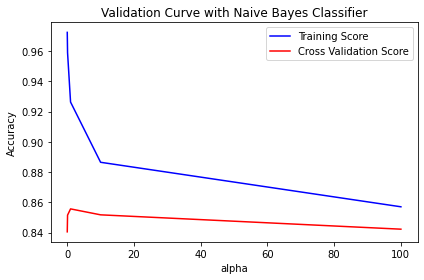

In [39]:
# https://www.geeksforgeeks.org/validation-curve/
# Plot mean accuracy scores for training and testing scores
plt.plot(alpha, train_acc,
     label = "Training Score", color = 'b')
plt.plot(alpha, test_acc,
   label = "Cross Validation Score", color = 'r')
 
# Creating the plot
plt.title("Validation Curve with Naive Bayes Classifier")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [40]:
grid_search.best_estimator_

MultinomialNB(alpha=1)

In [41]:
classifier = MultinomialNB(alpha=1)
classifier.fit(train_x_bow,y_train)

MultinomialNB(alpha=1)

In [42]:
predict = classifier.predict(test_x_bow)

In [43]:
print("accuracy is :",accuracy_score(y_test,predict))

accuracy is : 0.859


In [44]:
print("accuracy is :",classification_report(y_test,predict))

accuracy is :               precision    recall  f1-score   support

           0       0.85      0.87      0.86      5000
           1       0.87      0.84      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [45]:
dump(vec,"vectors.joblib")
dump(classifier,"model.joblib")

['model.joblib']